In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import sklearn

from pandas.api.types import is_numeric_dtype
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/Выборка_Краснодар.xlsx', sheet_name = 0)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Исп.2,Unnamed: 63,Сцепка_3,Сцепка_4,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,1_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12000000,...,NaN,NaN,9,NaN,3к2,NaN,NaN,0.0,"Продается отличная, большая, просторная кварти...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,2_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3700000,...,NaN,NaN,11 39.005982 45.099499,NaN,13,13,1.0,0.0,Продаётся уютная квартира в шикарном жк Победн...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
2,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,NaN,3.0,5 39.036192 45.010981,"65,5 5 39.036192 45.010981",132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
3,4_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12300000,...,NaN,NaN,4,NaN,39/2,NaN,NaN,0.0,Срочная Продажа! Продается большая трехкомнатн...,https://www.avito.ru/krasnodar/kvartiry/3-k._k...
4,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,NaN,17.0,15 38.970992 45.101935,92 15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,NaN,72.0,4 39.03868 45.079091,"36,9 4 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
34264,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,NaN,32.0,17 39.043307 45.078162,40 17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
34265,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,NaN,72.0,17 39.03868 45.079091,"36,6 17 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
34266,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,NaN,72.0,20 39.03868 45.079091,"36,6 20 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [3]:
df_1 = df[df['Мусор_1'] == 0]
df_1 = df_1[df_1['dup_res'] == 0]
df_1.reset_index(drop = True, inplace = True)
df_1

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Исп.2,Unnamed: 63,Сцепка_3,Сцепка_4,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,NaN,3.0,5 39.036192 45.010981,"65,5 5 39.036192 45.010981",132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,NaN,17.0,15 38.970992 45.101935,92 15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,NaN,45.0,9 38.905658 45.093702,23 9 38.905658 45.093702,39/2,39/2,1.0,0.0,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,NaN,7.0,2 39.029275 45.097119,20 2 39.029275 45.097119,5к3,5к3,1.0,0.0,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,NaN,13.0,7 38.897878 45.077226,"23,5 7 38.897878 45.077226",1/3к7,1/3к7,1.0,0.0,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,NaN,72.0,4 39.03868 45.079091,"36,9 4 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
21399,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,NaN,32.0,17 39.043307 45.078162,40 17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
21400,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,NaN,72.0,17 39.03868 45.079091,"36,6 17 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
21401,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,NaN,72.0,20 39.03868 45.079091,"36,6 20 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [4]:
df_1['ГП_1'] = df_1['ГП_1'].astype(int) #обращаю внимание, что год постройки воспринимался как object

In [5]:
X_i = df_1[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            #'Этажность_2',
            'ГП_1',
            #'Ремонт_2',
            'Ремонт_3',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Районы_2',
            'Многоуровневость',
            'Терраса',
            'ЖК_БД',
            #'Цена',
            'Цена(кв.м)',
            #'LN(Цена)'
            'Мусор_2'
          ]]

In [6]:
X = df_1[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            #'Этажность_2',
            'ГП_1',
            #'Ремонт_2',
            'Ремонт_3',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Районы_2',
            'Многоуровневость',
            'Терраса',
            'ЖК_БД',
            #'Цена',
            'Цена(кв.м)',
            #'LN(Цена)'
      ]]

Y = df_1['Мусор_2']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 9]


In [7]:
X_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21403 entries, 0 to 21402
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ОПлощадь          21403 non-null  float64
 1   Этаж_4            21403 non-null  object 
 2   Этажность_1       21403 non-null  int64  
 3   ГП_1              21403 non-null  int32  
 4   Ремонт_3          21403 non-null  object 
 5   Раст_центр_2      21403 non-null  object 
 6   Районы_2          21403 non-null  object 
 7   Многоуровневость  21403 non-null  int64  
 8   Терраса           21403 non-null  int64  
 9   ЖК_БД             21403 non-null  object 
 10  Цена(кв.м)        21403 non-null  float64
 11  Мусор_2           21403 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 1.9+ MB


In [8]:
X_i.isnull().sum()

ОПлощадь            0
Этаж_4              0
Этажность_1         0
ГП_1                0
Ремонт_3            0
Раст_центр_2        0
Районы_2            0
Многоуровневость    0
Терраса             0
ЖК_БД               0
Цена(кв.м)          0
Мусор_2             0
dtype: int64

In [9]:
X_cat = X_i.iloc[:, cat_features]
X_num = X_i.drop(X_cat.columns, axis = 1)

In [10]:
X_cat

,Этаж_4,Ремонт_3,Раст_центр_2,Районы_2,ЖК_БД
0,последний,стандартный,от_5000_до_10000,Черемушки,нет
1,этажи_11-25,стандартный,от_5000_до_10000,Энка,нет
2,этажи_6-10,стандартный,от_5000_до_10000,Западный_обход,нет
3,этажи_2-5,стандартный,от_5000_до_10000,Российский_Ипподром,нет
4,этажи_6-10,стандартный,от_5000_до_10000,Славянский_Микрохирургии_глаза,нет
...,...,...,...,...,...
21398,этажи_2-5,предчистовая,от_5000_до_10000,Любимово,нет
21399,последний,предчистовая,от_5000_до_10000,Любимово,нет
21400,этажи_11-25,предчистовая,от_5000_до_10000,Любимово,нет
21401,этажи_11-25,предчистовая,от_5000_до_10000,Любимово,нет


In [11]:
X_num

,ОПлощадь,Этажность_1,ГП_1,Многоуровневость,Терраса,Цена(кв.м),Мусор_2
0,65.5,5,1975,0,0,128229.007634,0.0
1,92.0,17,2010,0,0,119565.217391,0.0
2,23.0,16,2020,0,0,173913.000000,0.0
3,20.0,3,2017,0,0,142500.000000,0.0
4,23.5,10,2017,0,0,144680.851064,0.0
...,...,...,...,...,...,...,...
21398,36.9,24,2022,0,0,165311.653117,0.0
21399,40.0,17,2023,0,0,149950.000000,0.0
21400,36.6,24,2022,0,0,150273.224044,0.0
21401,36.6,24,2022,0,0,146693.989071,0.0


In [12]:
X_num.describe()

,ОПлощадь,Этажность_1,ГП_1,Многоуровневость,Терраса,Цена(кв.м),Мусор_2
count,21403.000000,21403.000000,21403.000000,21403.000000,21403.000000,21403.000000,21403.000000
mean,53.055988,15.463954,2013.692940,0.004158,0.003364,118642.773670,0.395412
std,23.105301,6.158707,13.865757,0.064352,0.057904,44334.608247,0.488950
min,10.000000,2.000000,1910.000000,0.000000,0.000000,33870.967742,0.000000
25%,37.300000,10.000000,2013.000000,0.000000,0.000000,89338.257566,0.000000
50%,48.100000,16.000000,2018.000000,0.000000,0.000000,110591.900312,0.000000
75%,64.400000,19.000000,2021.000000,0.000000,0.000000,136363.636364,1.000000
max,325.000000,27.000000,2024.000000,1.000000,1.000000,729344.537815,1.000000


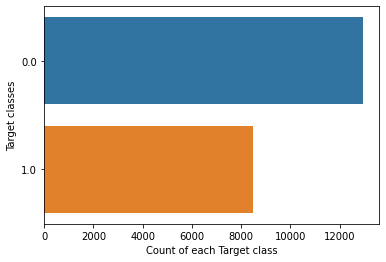

In [13]:
sns.countplot(y = X_i['Мусор_2']  , data = X_i)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [14]:
X_i['Мусор_2'].value_counts()

0.0    12940
1.0     8463
Name: Мусор_2, dtype: int64

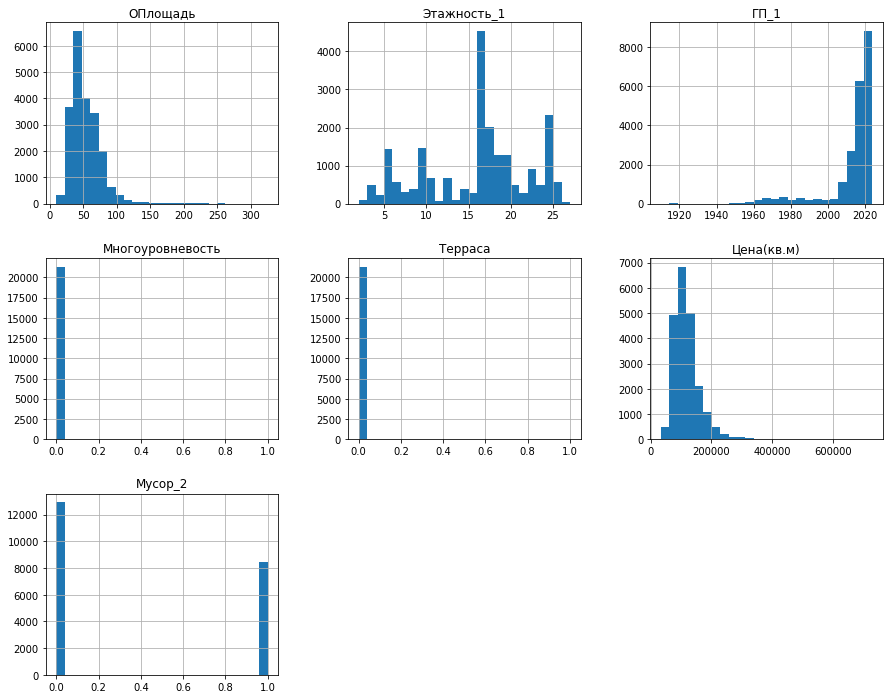

In [15]:
X_num.hist(figsize = (15,12), bins = 25)
plt.title("Features Distribution")
plt.show()

interval columns not set, guessing: ['Мусор_2', 'ОПлощадь', 'Этажность_1', 'ГП_1', 'Многоуровневость', 'Терраса', 'Цена(кв.м)']


<AxesSubplot: >

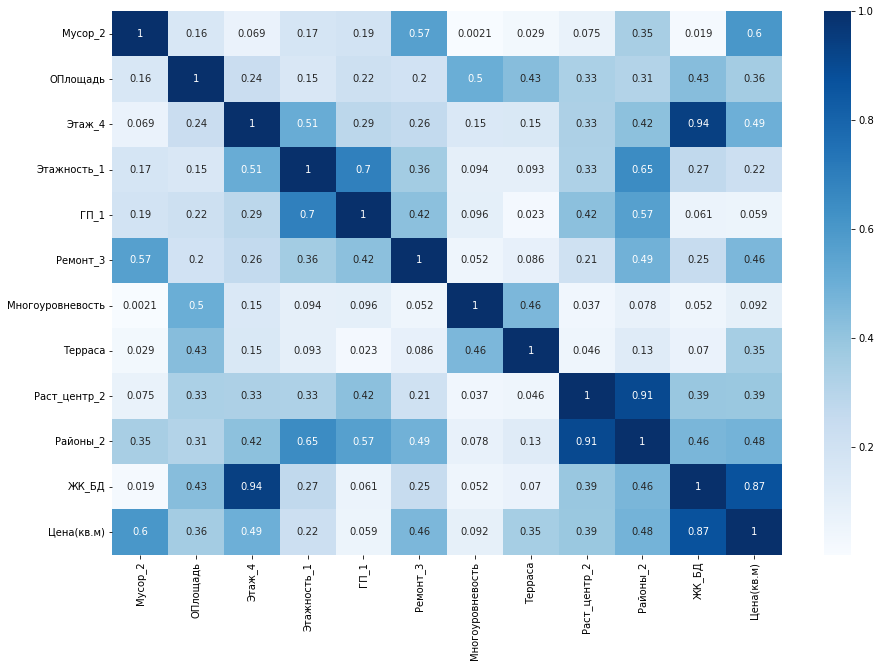

In [16]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = X_i[['Мусор_2', 'ОПлощадь', 'Этаж_4', 'Этажность_1', 'ГП_1', 'Ремонт_3', 'Многоуровневость', 
                      'Терраса', 'Раст_центр_2', 'Районы_2', 'ЖК_БД', 'Цена(кв.м)']].phik_matrix()
plt.figure(figsize = (15, 10))

sns.heatmap(phik_overview, annot = True, cmap = "Blues")

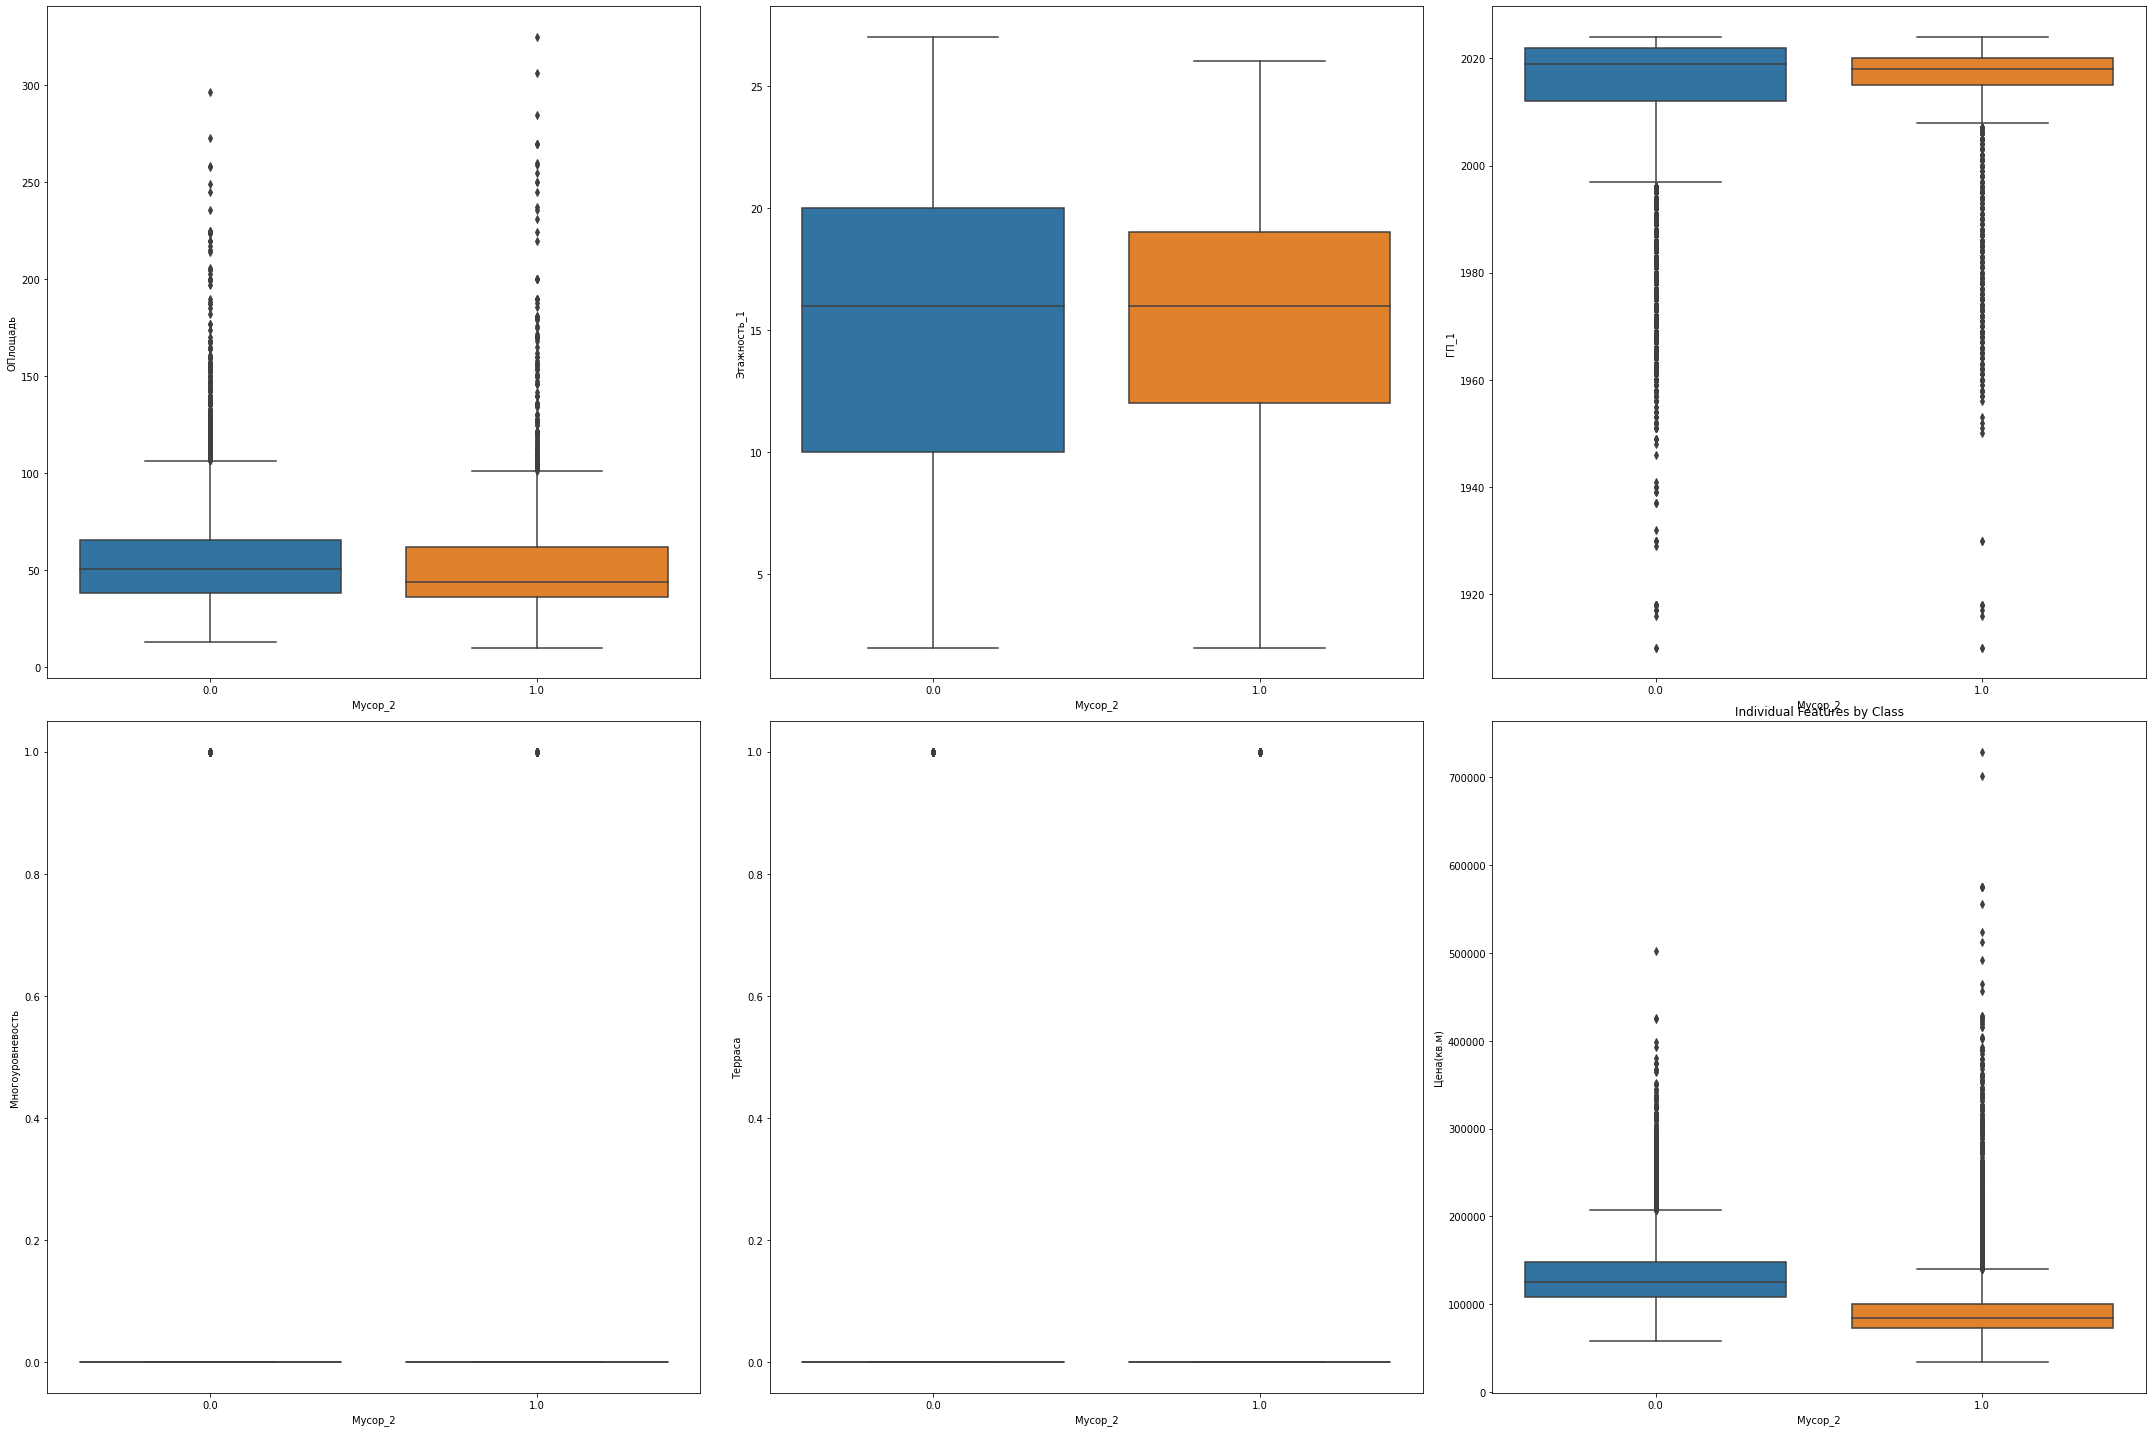

In [47]:
n_cols = 3
n_rows = math.ceil((len(X_num.columns) - 1)/n_cols) #в X_num сидит target, пожтому -1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (30, 20))
row = 0
col = 0

for j, i in enumerate(X_num):
    if j == len(X_num.columns) - 1: #в X_num сидит target
        break
    else:
        if col > 2:
            row += 1
            col = 0
        axes = ax[row, col]
        sns.boxplot(x = X_i['Мусор_2'], y = X_num[i], ax = axes)
        col += 1

plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

<Figure size 800x640 with 0 Axes>

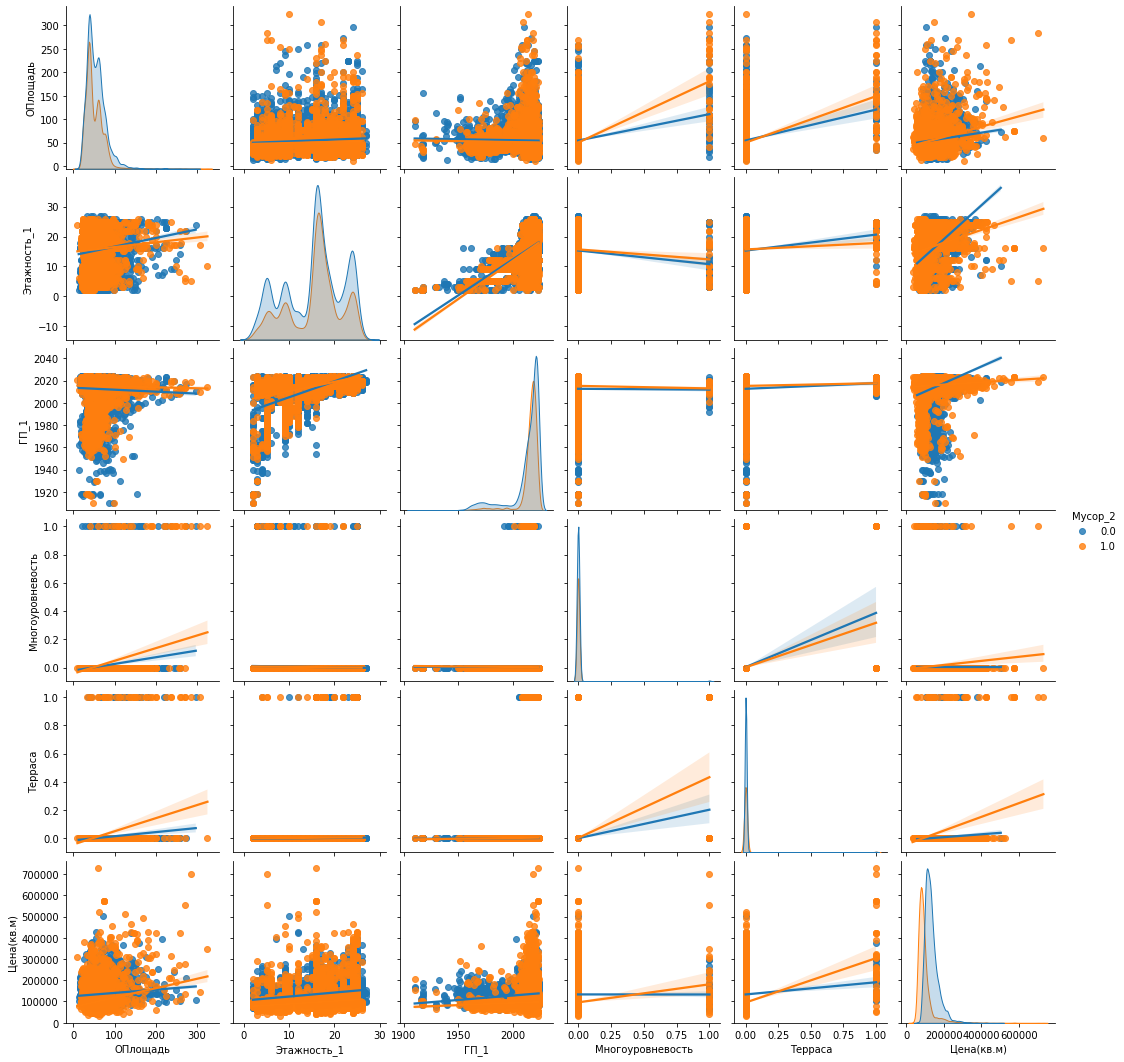

In [48]:
plt.figure(figsize = (10, 8), dpi = 80)
sns.pairplot(X_num, kind = "reg", hue = "Мусор_2")
plt.show()

In [52]:
X_num.groupby('Мусор_2').mean()

,ОПлощадь,Этажность_1,ГП_1,Многоуровневость,Терраса,Цена(кв.м)
Мусор_2,,,,,,
0.0,54.709731,15.315842,2012.661901,0.004560,0.002396,133339.631595
1.0,50.527400,15.690417,2015.269408,0.003545,0.004845,96171.151130


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


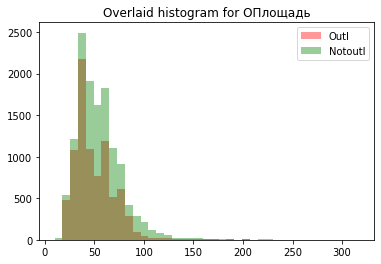

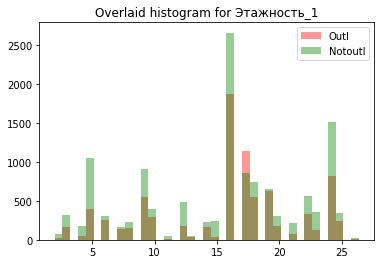

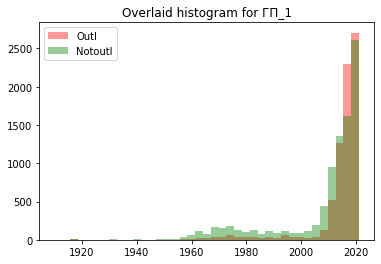

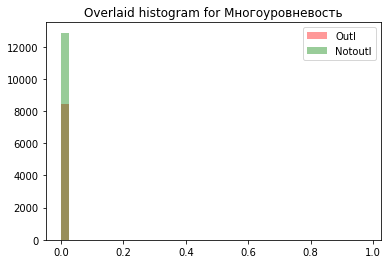

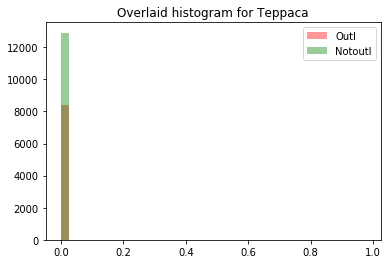

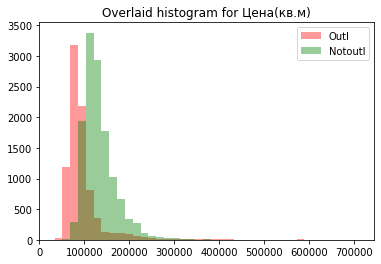

In [54]:
for i in X_num.drop('Мусор_2', axis = 1).columns:
    notoutl = list(X_num[X_num['Мусор_2'] == 0][i].dropna())
    outl = list(X_num[X_num['Мусор_2'] == 1][i].dropna())
    
    xmin = min(min(outl), min(notoutl))
    xmax = max(max(outl), max(notoutl))
    
    width = (xmax - xmin) / 40
    
    sns.distplot(outl, color = 'r', kde = False, bins = np.arange(xmin, xmax, width))
    sns.distplot(notoutl, color = 'g', kde = False, bins = np.arange(xmin, xmax, width))
    plt.legend(['Outl', 'Notoutl'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [50]:
X_cat.describe()

,Этаж_4,Ремонт_3,Раст_центр_2,Районы_2,ЖК_БД
count,21403,21403,21403,21403,21403
unique,6,7,5,28,3
top,этажи_2-5,улучшенный,от_5000_до_10000,Российский_Ипподром,нет
freq,6225,6055,13583,3240,20934


<Figure size 432x288 with 0 Axes>

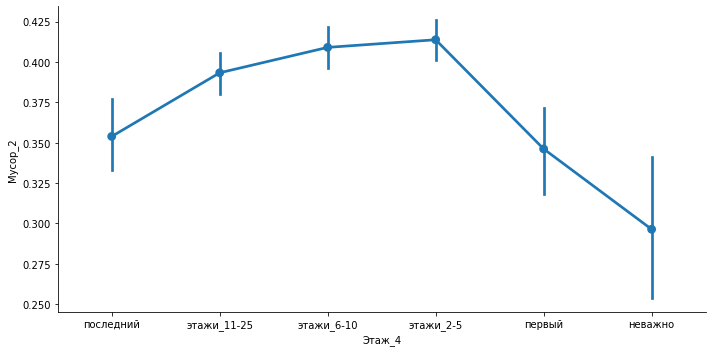

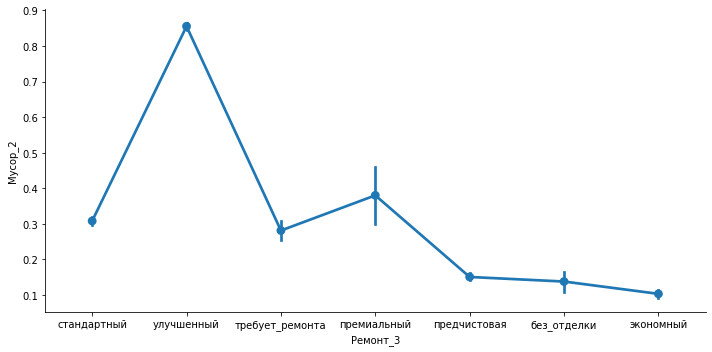

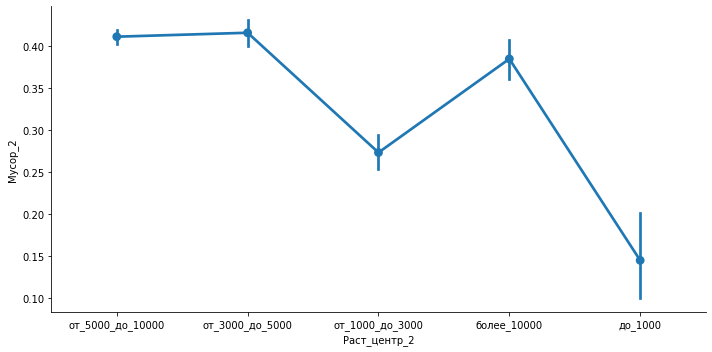

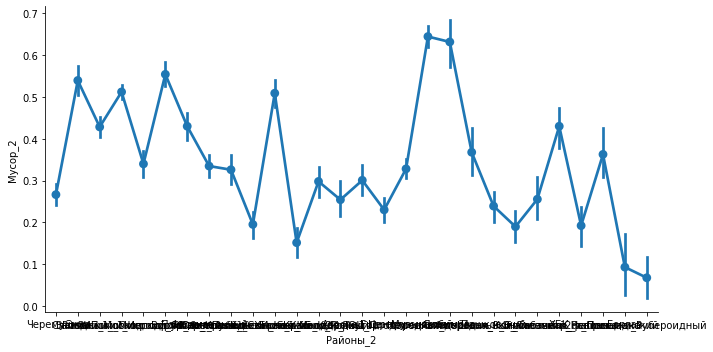

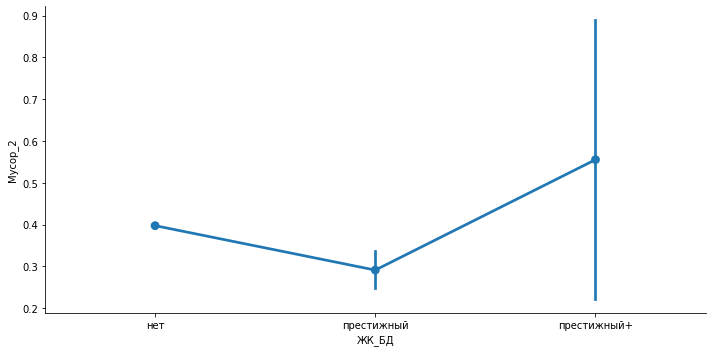

In [56]:
for i, col in enumerate(X_cat):
    plt.figure(i)
    sns.catplot(x = col, y = 'Мусор_2', data = X_i, kind = 'point', aspect = 2)

По графикам выше можно увидеть вероятность быть/не быть выбросом по разным классам факторов.

В процессе анализа необходимо понять какие пропуски и чем можно заполнить, а также какие признаки можнно создать или объединить.

In [59]:
X_i.pivot_table('Мусор_2', index = 'ЖК_БД', columns = 'Ремонт_3', aggfunc = 'count')

Ремонт_3,без_отделки,предчистовая,премиальный,стандартный,требует_ремонта,улучшенный,экономный
ЖК_БД,,,,,,,
нет,583.0,5187.0,86.0,5822.0,997.0,5919.0,2340.0
престижный,11.0,164.0,62.0,68.0,6.0,135.0,14.0
престижный+,1.0,5.0,2.0,NaN,NaN,1.0,NaN


In [60]:
X_i[['ЖК_БД', 'Мусор_2']].groupby('ЖК_БД').mean()

,Мусор_2
ЖК_БД,
нет,0.397631
престижный,0.291304
престижный+,0.555556


Больше всего выбросов обнаружено в Престиж+

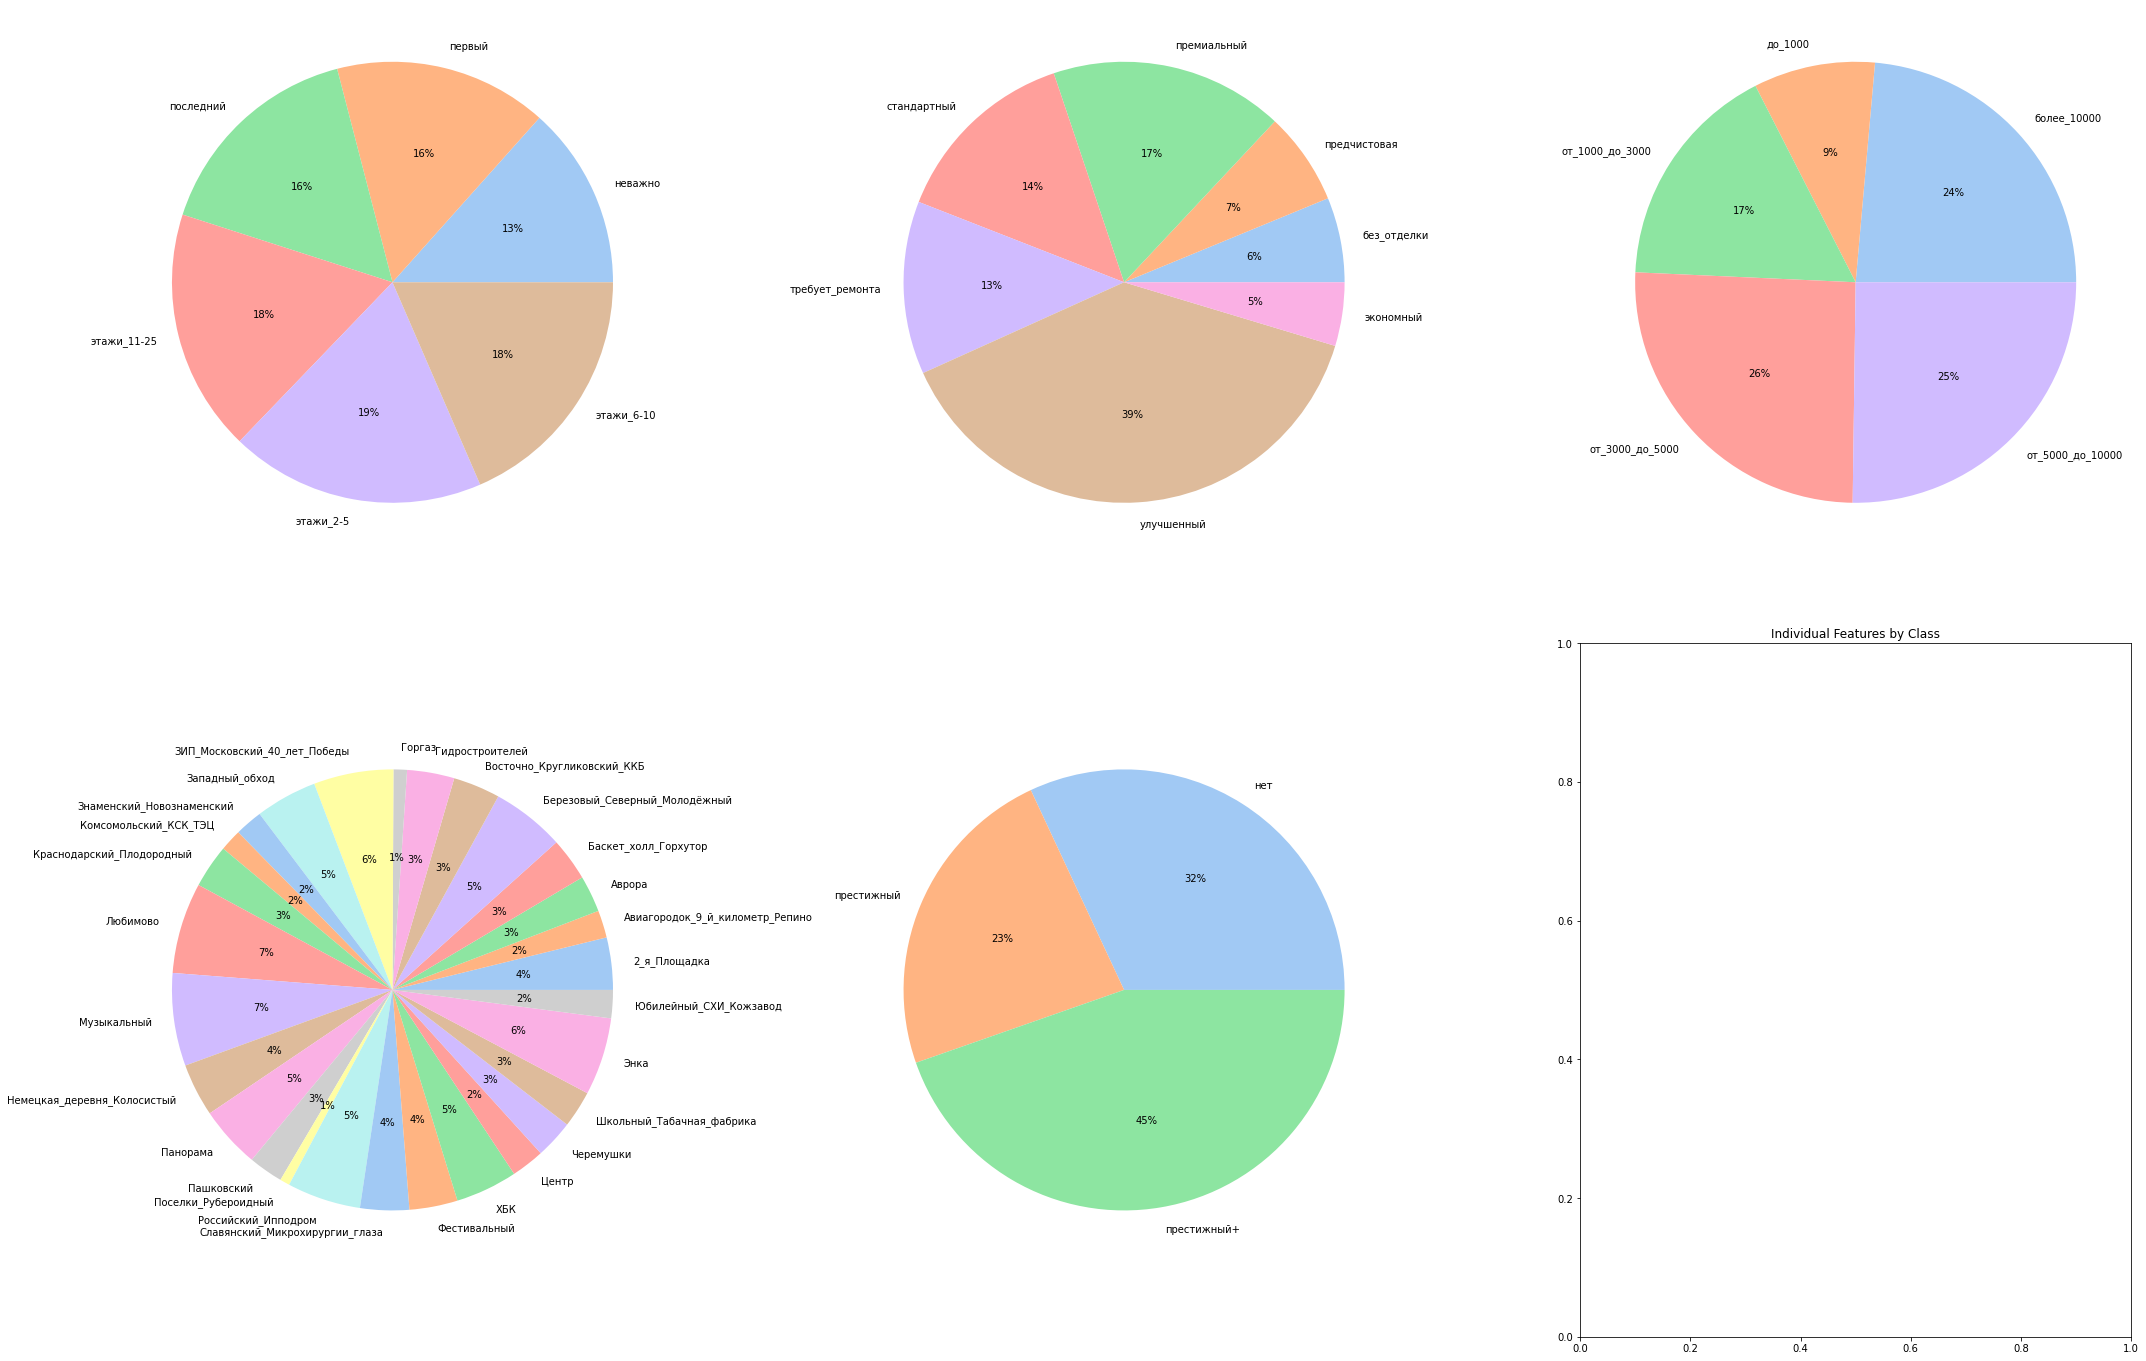

In [73]:
n_cols = 3
n_rows = math.ceil(len(X_cat.columns)/n_cols) #в X_num сидит target, пожтому -1

fig, axs = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (30, 20))
# row = 0
# col = 0

for i, ax in zip(X_cat, axs.flat):
#     if col > 2:
#         row += 1
#         col = 0
#     axes = ax[row, col]
    
    d = X_i[[i, 'Мусор_2']].groupby(i).mean()
    
    n = len(X_cat[i].unique())
    colors = sns.color_palette('pastel')[0:n]
    ax.pie(d['Мусор_2'], labels = d.index, colors = colors, autopct = '%.0f%%')
#     col += 1

plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

In [74]:
X_cat.columns

Index(['Этаж_4', 'Ремонт_3', 'Раст_центр_2', 'Районы_2', 'ЖК_БД'], dtype='object')

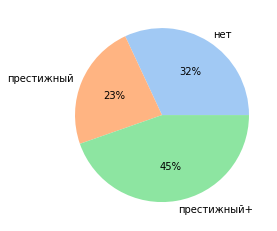

In [69]:
d = X_i[['ЖК_БД', 'Мусор_2']].groupby('ЖК_БД').mean()

n = len(X_cat['ЖК_БД'].unique())
colors = sns.color_palette('pastel')[0:n]
plt.pie(d['Мусор_2'], labels = d.index, colors = colors, autopct = '%.0f%%');

In [ ]:
#заполнение пропусков
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

train_df['Cabin_indicator'] = np.where(train_df['Cabin'].isnull(), 0, 1) #если в ячейке пустота, то 0, иначе 1

binary_gender = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(binary_gender)

train_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop(columns = ['price_range']))

pca_df = pd.DataFrame(data=principal_components, columns = ['PC1', 'PC2'])
pca_df['Classes'] = df['price_range'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Classes', palette='Set2', legend='full')
plt.title('Phone classes (train dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()